# Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [2]:
train_df= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df= pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
# check numbers of samples and features
print("Size of train data before dropping Id feature: {}".format(train_df.shape))
print("Size of test data before dropping Id feature: {}".format(test_df.shape))

# saving the 'Id'column
train_id= train_df['Id']
test_id= test_df['Id']

#droping 'Id' column as it is unnecessary for the prediction
train_df.drop('Id', axis=1,inplace= True)
test_df.drop('Id', axis=1, inplace= True)

print('Size of train data after dropping Id feature: {}'.format(train_df.shape))
print('Size of test data after dropping Id feature: {}'.format(test_df.shape))



Size of train data before dropping Id feature: (1460, 81)
Size of test data before dropping Id feature: (1459, 80)
Size of train data after dropping Id feature: (1460, 80)
Size of test data after dropping Id feature: (1459, 79)


In [4]:
# selecting int data type columns
train_df = train_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

In [5]:
test_df=test_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [6]:
train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [8]:
test_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [9]:
train_df.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [10]:
# getting description
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Average house price is $180921**

In [11]:
#most correlated features with the price
corrmat=train_df.corr()
k=10
sale_cols= corrmat.nlargest(k,'SalePrice')['SalePrice'].index
corr_feat= pd.DataFrame(sale_cols)
corr_feat.columns= ['Most Correlated Features']

corr_feat

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


## Correlation

**OverallQual:** Rates the overall material and finish of the house(1=very poor to 10= very excellent)

**GrLivArea:** Above grade (ground) living area square feet

**GarageCars:** Size of garage in car capacity

**GarageArea:** Size of garage in square feet

**TotalBsmtSF:** Total square feet of basement area

**1stFlrSF:** First Floor square feet

**FullBath:** Full bathrooms above grade

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**YearBuilt:** Original construction date

Excluding SalePrice as correlation between SalePrice & SalePrice is not possible so,We will start the correlation with OverallQual 

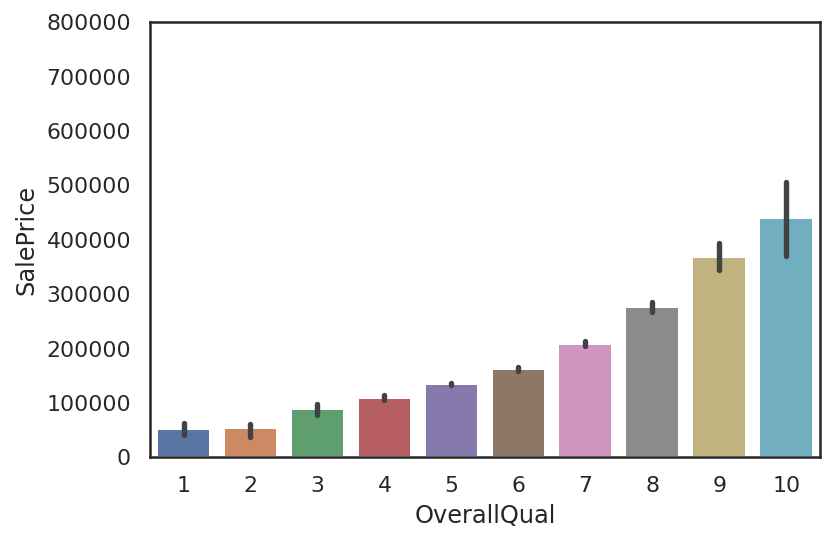

In [12]:
fig=sns.barplot(x=train_df['OverallQual'],y=train_df['SalePrice'])
fig.axis(ymin=0, ymax=800000);

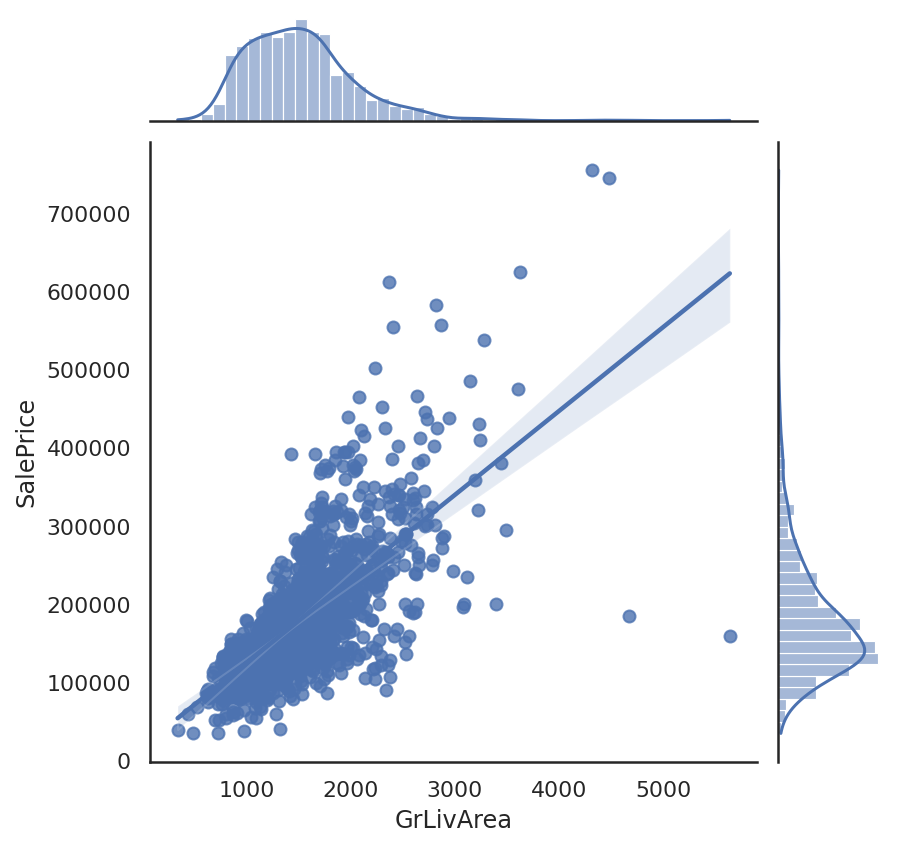

In [13]:
sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],kind='reg')

In above correlation, there are two data points tells that people will pay less for large living area(area square feet). These are the outliers as it is not making sense so we will drop it.

In [14]:
tain_df= train_df.drop(train_df[(train_df['GrLivArea']>4000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

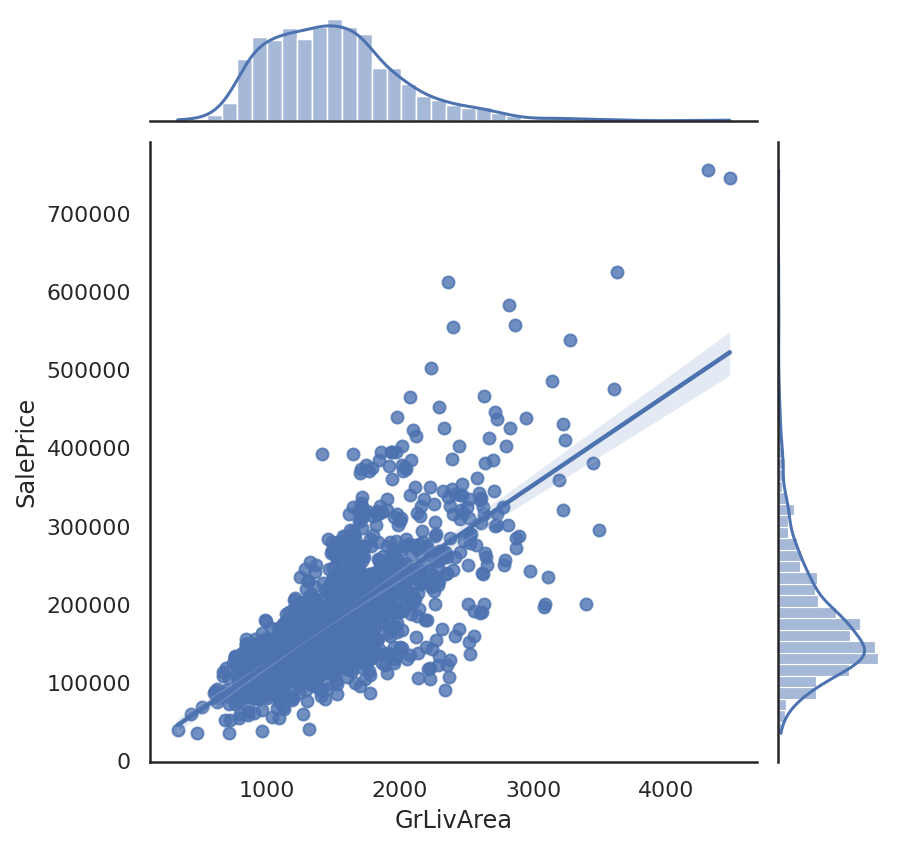

In [15]:
sns.jointplot(x=tain_df['GrLivArea'],y=tain_df['SalePrice'],kind='reg')

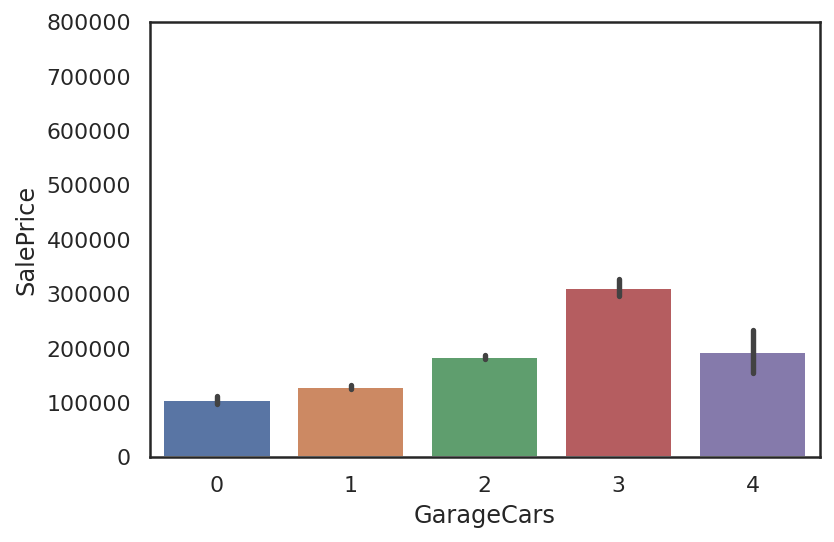

In [16]:
fig=sns.barplot(x=train_df['GarageCars'], y=train_df['SalePrice'])
fig.axis(ymin=0, ymax=800000);

In the above correlation, Sale price with 4 garage cars is less than the sale price with three other garage cars. Thus, it is an outlier as it is not making any sense to this correlation. So we have to remove it.

In [17]:
train_df1= train_df.drop(train_df[(train_df['GarageCars']>3)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

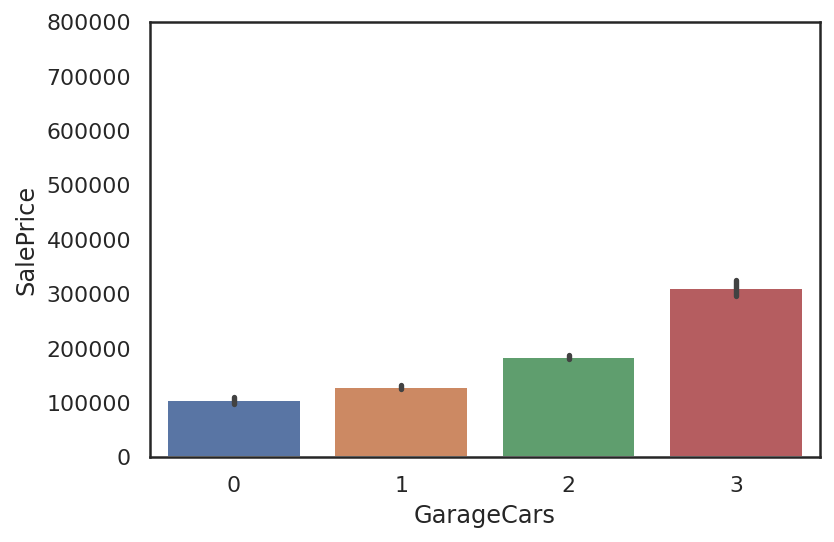

In [18]:
fig=sns.barplot(x=train_df1['GarageCars'], y=train_df1['SalePrice'])
fig.axis(ymin=0, ymax=800000);

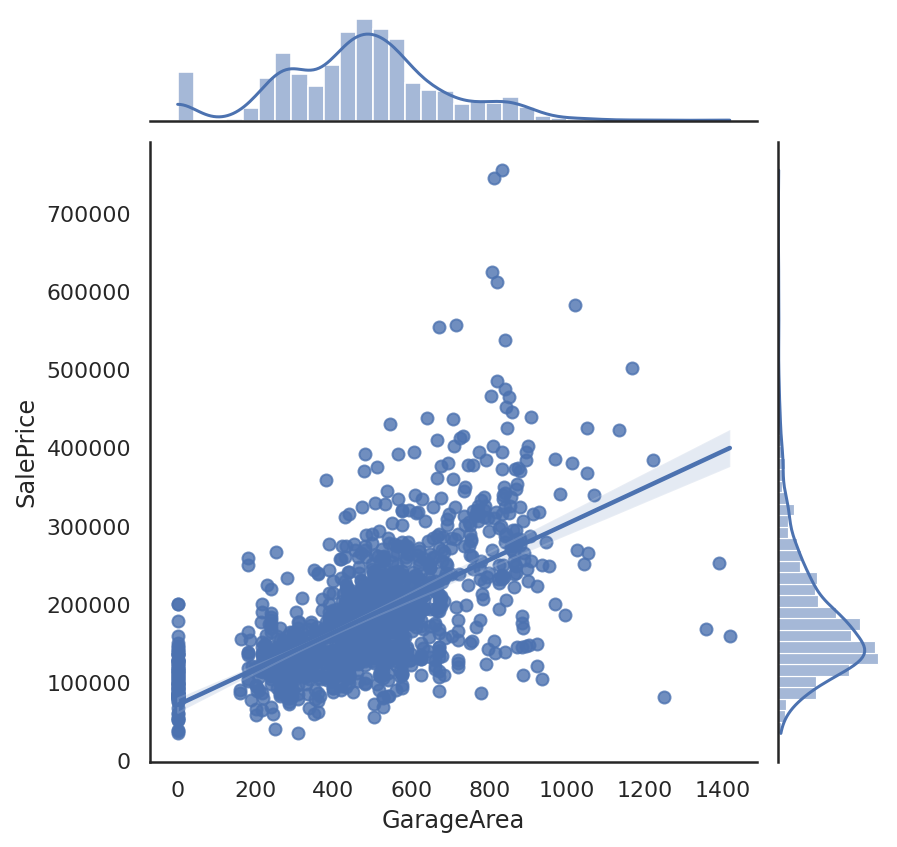

In [19]:
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')

In [20]:
train_df2= train_df.drop(train_df[(train_df['GarageArea']>1000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

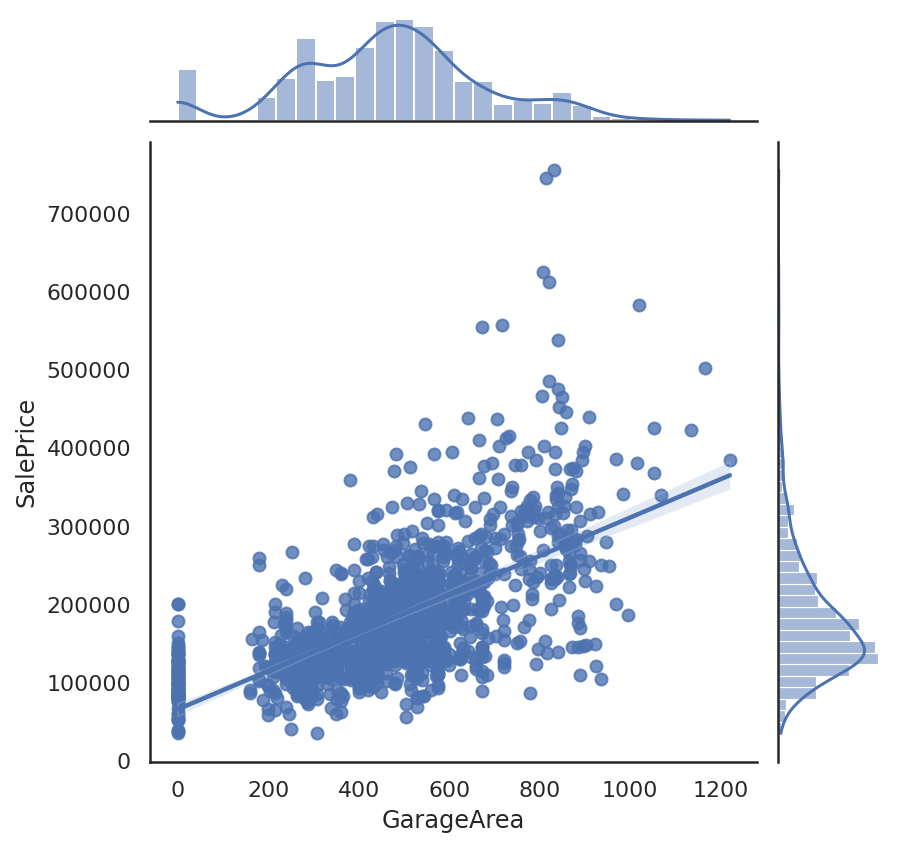

In [21]:
sns.jointplot(x=train_df2['GarageArea'],y=train_df2['SalePrice'],kind='reg')

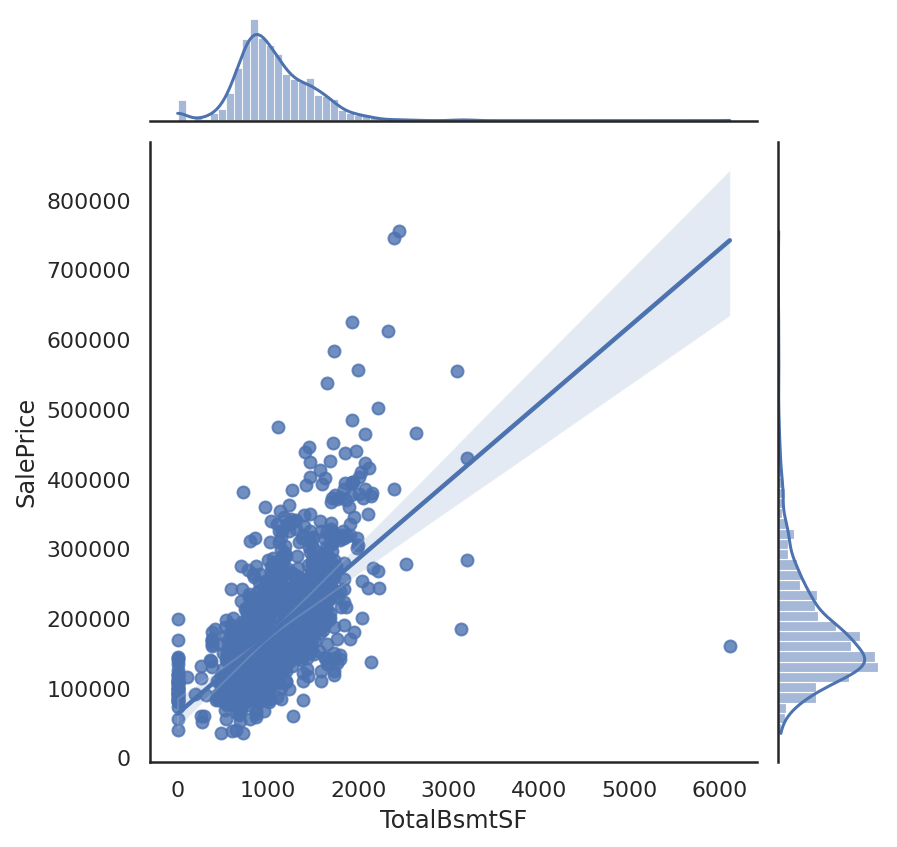

In [22]:
sns.jointplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'],kind='reg')

In [23]:
train_df3= train_df.drop(train_df[(train_df['TotalBsmtSF']>5000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

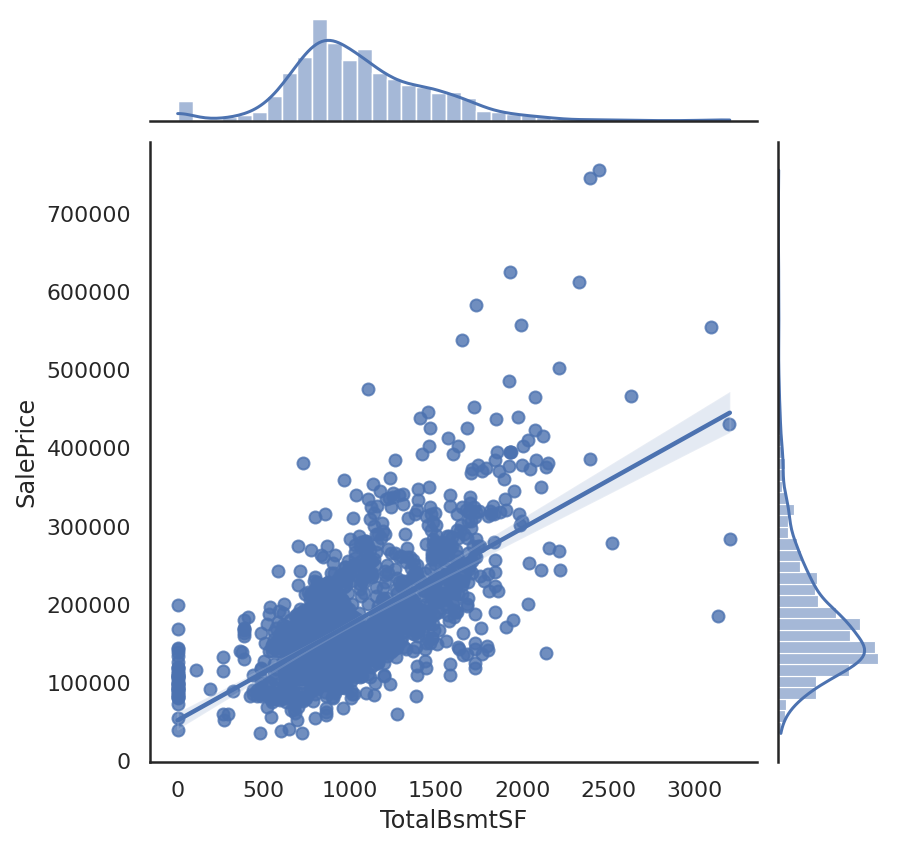

In [24]:
sns.jointplot(x=train_df3['TotalBsmtSF'],y=train_df3['SalePrice'],kind='reg')

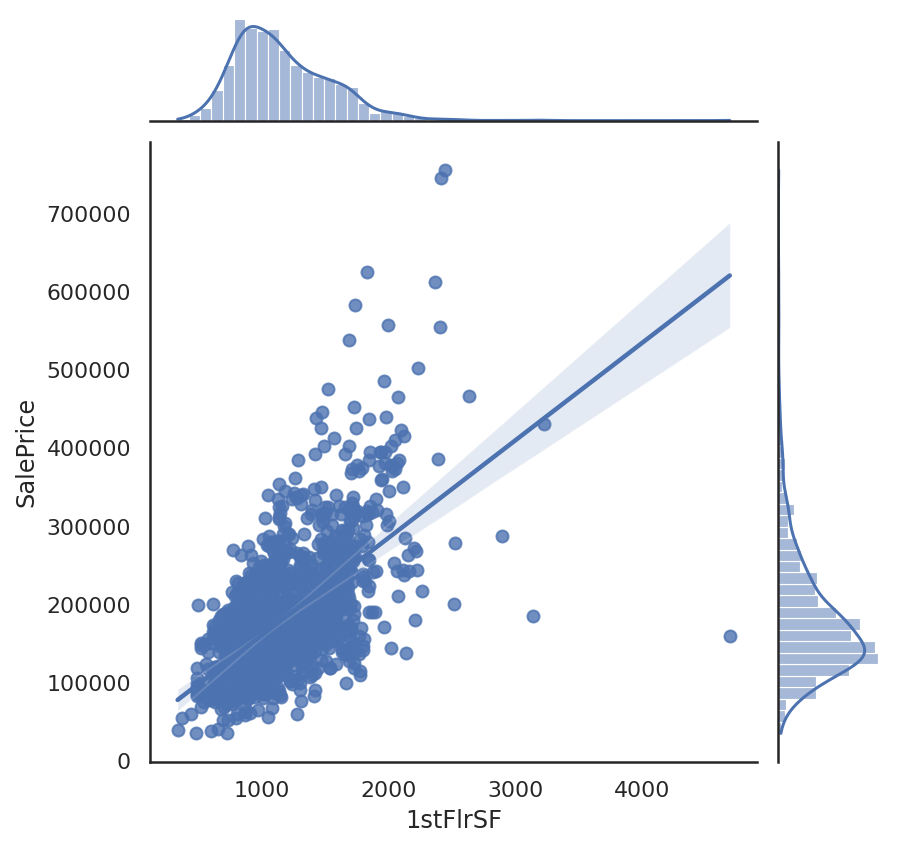

In [25]:
sns.jointplot(x=train_df['1stFlrSF'],y=train_df['SalePrice'],kind='reg')

In [26]:
train_df3= train_df.drop(train_df[(train_df['1stFlrSF']>3000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

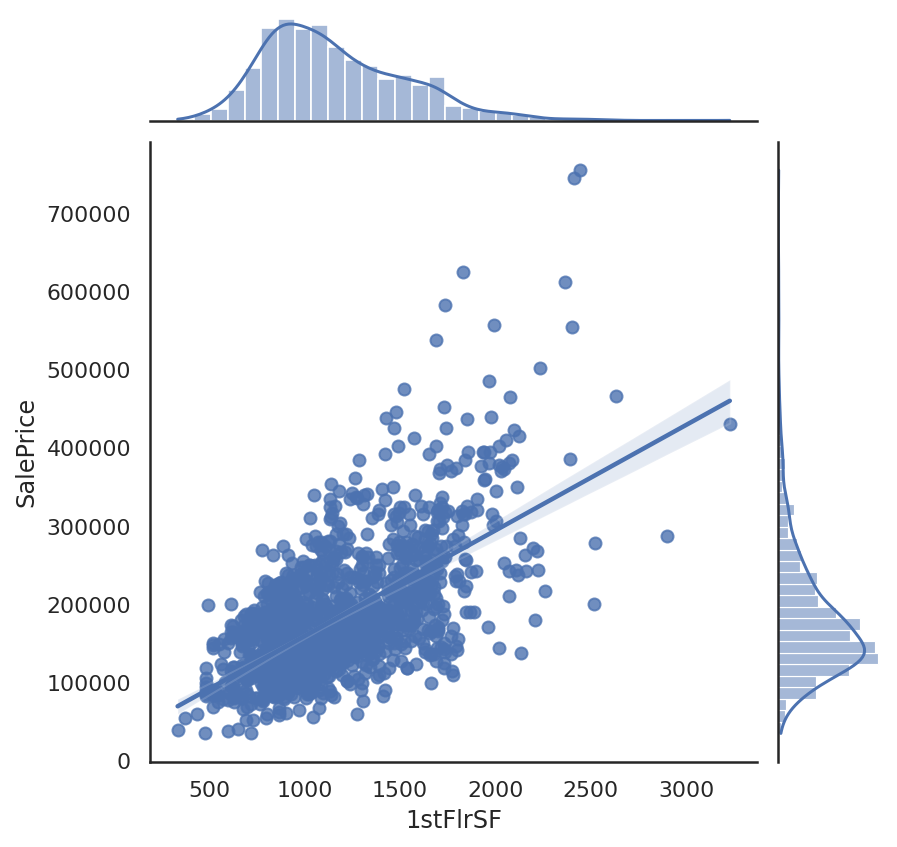

In [27]:
sns.jointplot(x=train_df3['1stFlrSF'],y=train_df3['SalePrice'],kind='reg')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

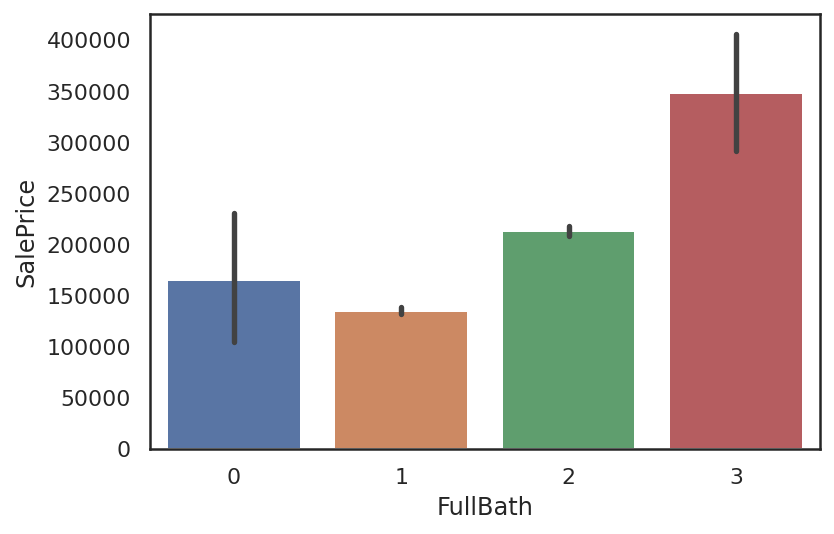

In [28]:
sns.barplot(x=train_df['FullBath'],y=train_df['SalePrice'])

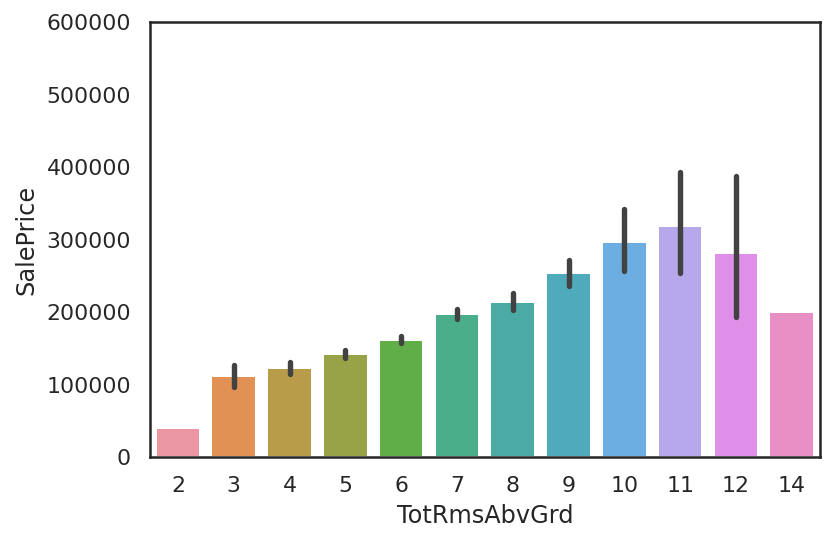

In [29]:
fig=sns.barplot(x=train_df['TotRmsAbvGrd'],y=train_df['SalePrice'])
fig.axis(ymin=0, ymax=600000);

Getting 14 rooms at low price, it's not even making sense. Lets remove the last outlier from this correlation.

In [30]:
train_df4= train_df.drop(train_df[(train_df['TotRmsAbvGrd']>12)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

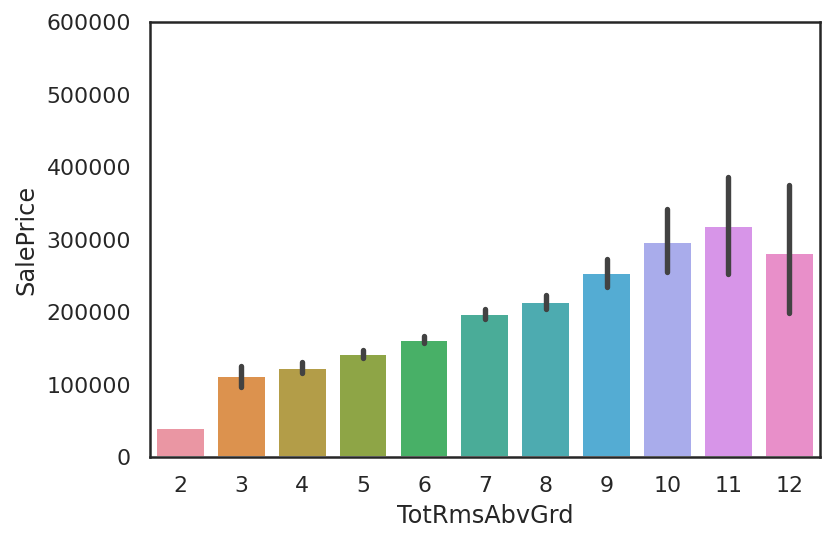

In [31]:
fig=sns.barplot(x=train_df4['TotRmsAbvGrd'],y=train_df4['SalePrice'])
fig.axis(ymin=0, ymax=600000);

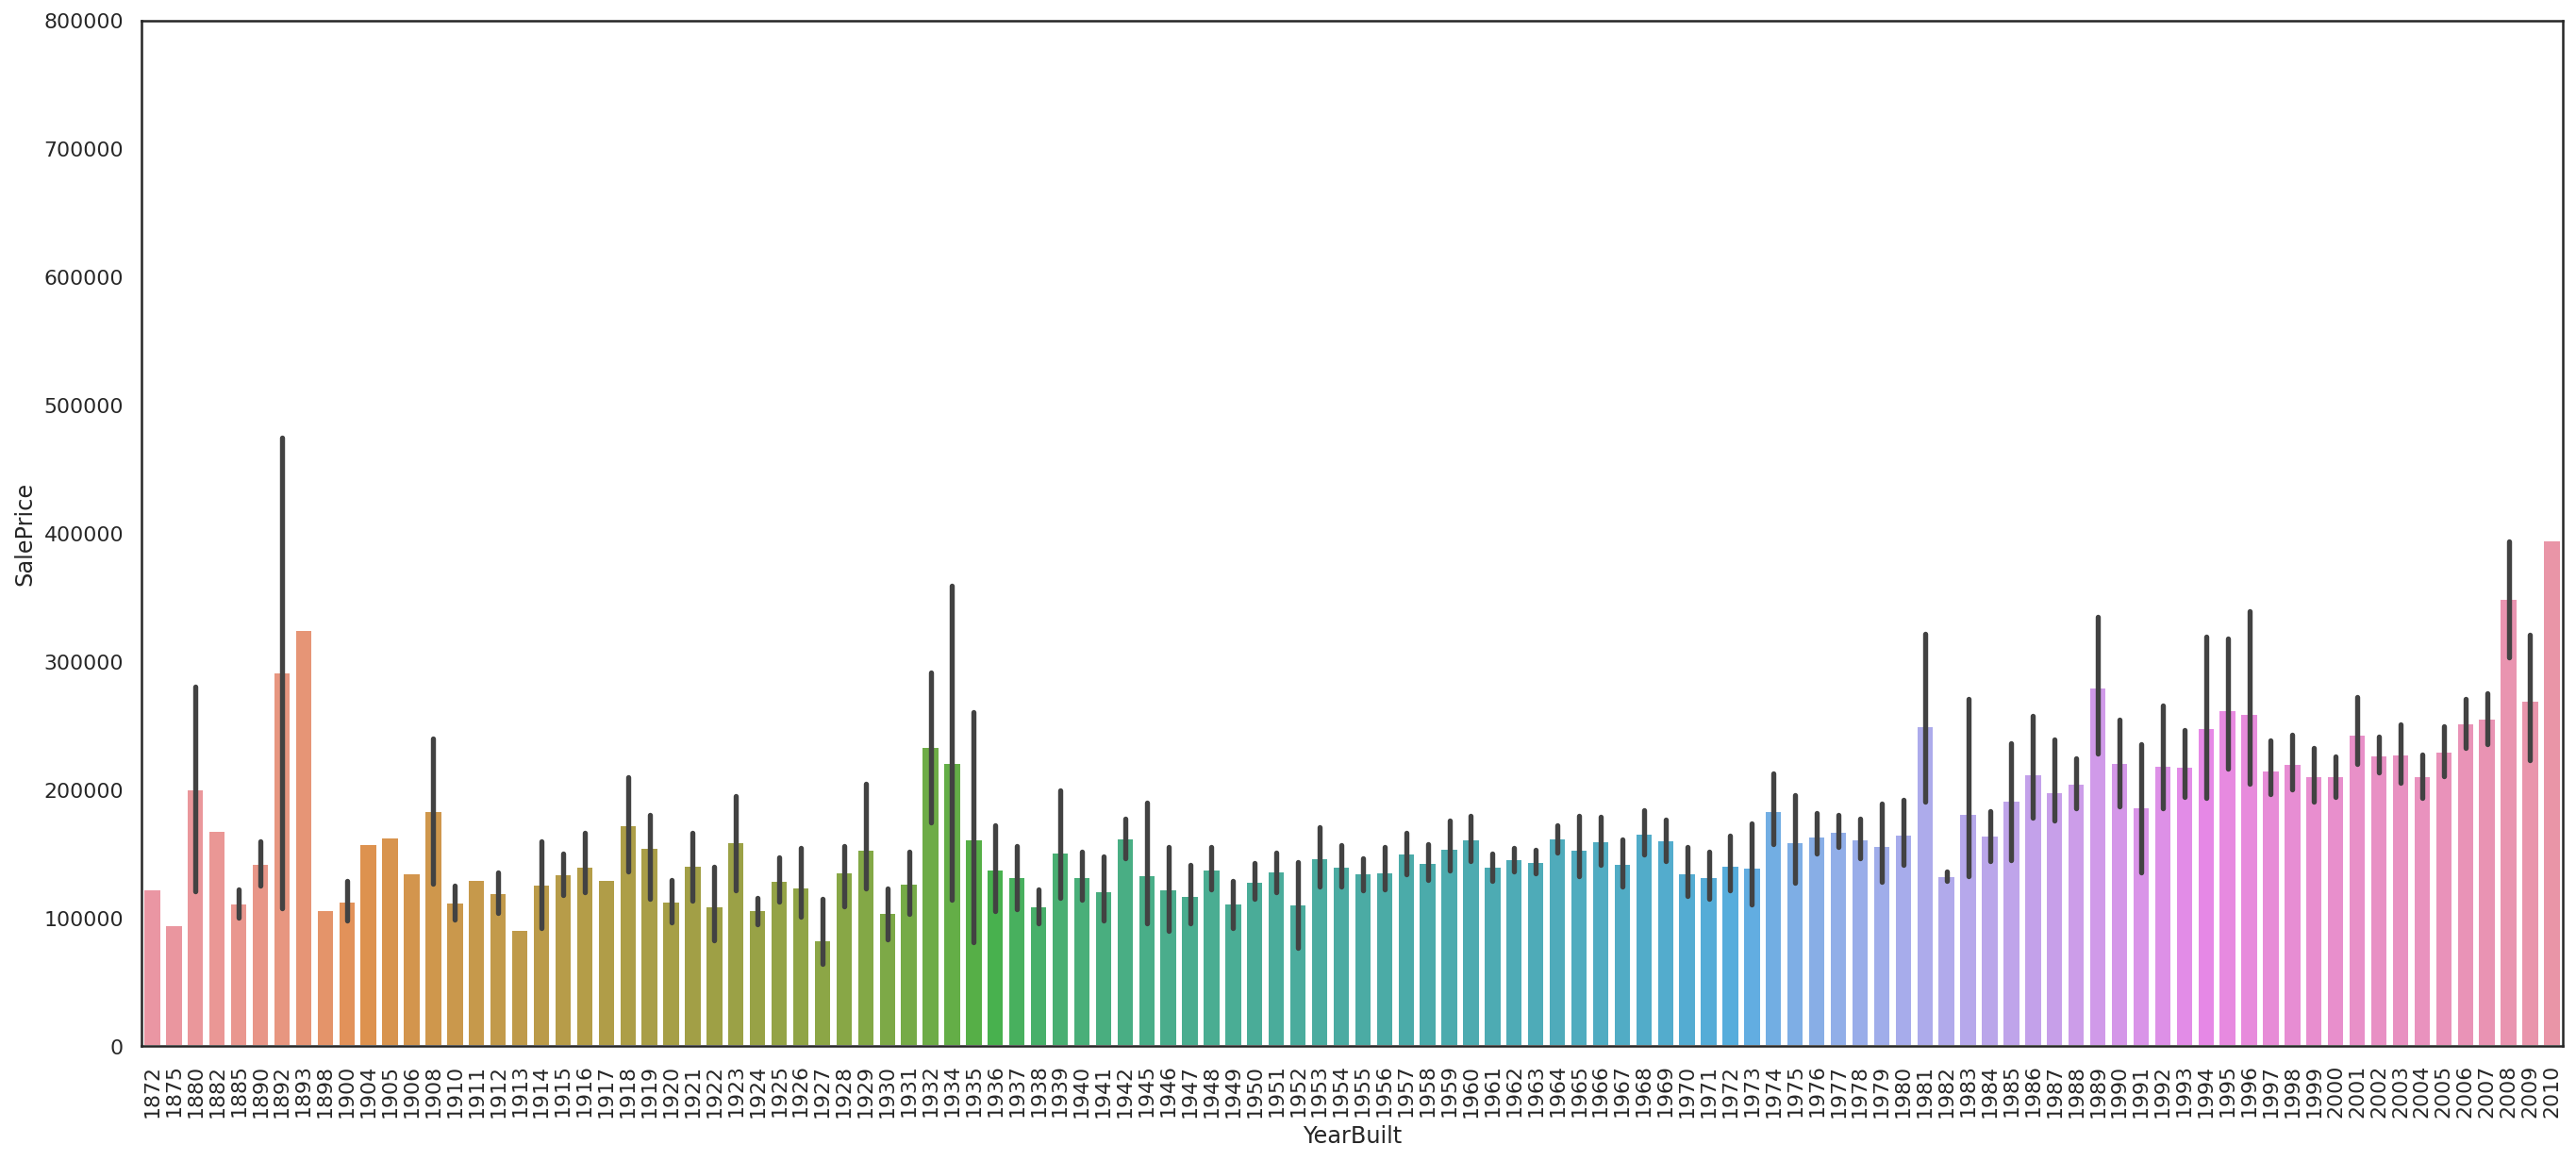

In [32]:
data= pd.concat([train_df['SalePrice'],train_df['YearBuilt']],axis=1)
f,ax=plt.subplots(figsize=(23,10))
fig=sns.barplot(x=train_df['YearBuilt'],y=train_df['SalePrice'],data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90);


In [33]:
#missing data in train dataset
total_train= train_df.isnull().sum().sort_values(ascending= False)
percent= (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total_train, percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [34]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [35]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
dtype: int64

In [36]:
total_test=test_df.isnull().sum().sort_values(ascending= False)
percent= (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total_test, percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [37]:
test_df = test_df.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [38]:
test_df.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
dtype: int64

In [39]:
#filling the missing values
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [40]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

OverallQual     0
YearBuilt       0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
dtype: int64

In [41]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())


In [42]:
test_df.isnull().sum().sort_values(ascending=False).head(10)

OverallQual     0
FullBath        0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
GrLivArea       0
YearBuilt       0
dtype: int64

In [43]:
X_train,X_test,y_train,y_test=train_test_split(train_df.drop('SalePrice', axis=1),train_df['SalePrice'],test_size=0.3,random_state=101)

In [44]:
# Fitting & transforming the data:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
X_scaler= StandardScaler()
Y_scaler= StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
y_train =Y_scaler.fit_transform(y_train)
y_test = X_scaler.fit_transform(y_test)

In [45]:
X_train

array([[ 1.37391375,  0.60515581,  0.23568488, ...,  1.304123  ,
         3.25041401, -0.72256436],
       [-1.53923947, -2.09440436, -1.72181167, ...,  0.259882  ,
        -0.77348662, -0.72256436],
       [ 0.64562544,  1.24630134,  1.16549575, ...,  0.80552144,
        -0.77348662,  1.1223738 ],
       ...,
       [-0.08266286,  0.26771079, -0.25368926, ..., -0.09760591,
         0.52220938, -0.72256436],
       [ 0.64562544,  1.11132334,  0.96974609, ..., -0.20108925,
         0.57854399, -0.13995231],
       [-0.81095116, -0.44092376, -1.28137495, ...,  0.93722751,
        -0.77348662, -0.72256436]])

In [46]:
#fitting the data in linear regression
train_lr= LinearRegression()
train_lr.fit(X_train,y_train)
print(train_lr)

LinearRegression()


In [47]:
print(train_lr.intercept_)

[6.01577552e-18]


# Prediction

In [48]:
predictions = train_lr.predict(X_test)
predictions= predictions.reshape(-1,1)

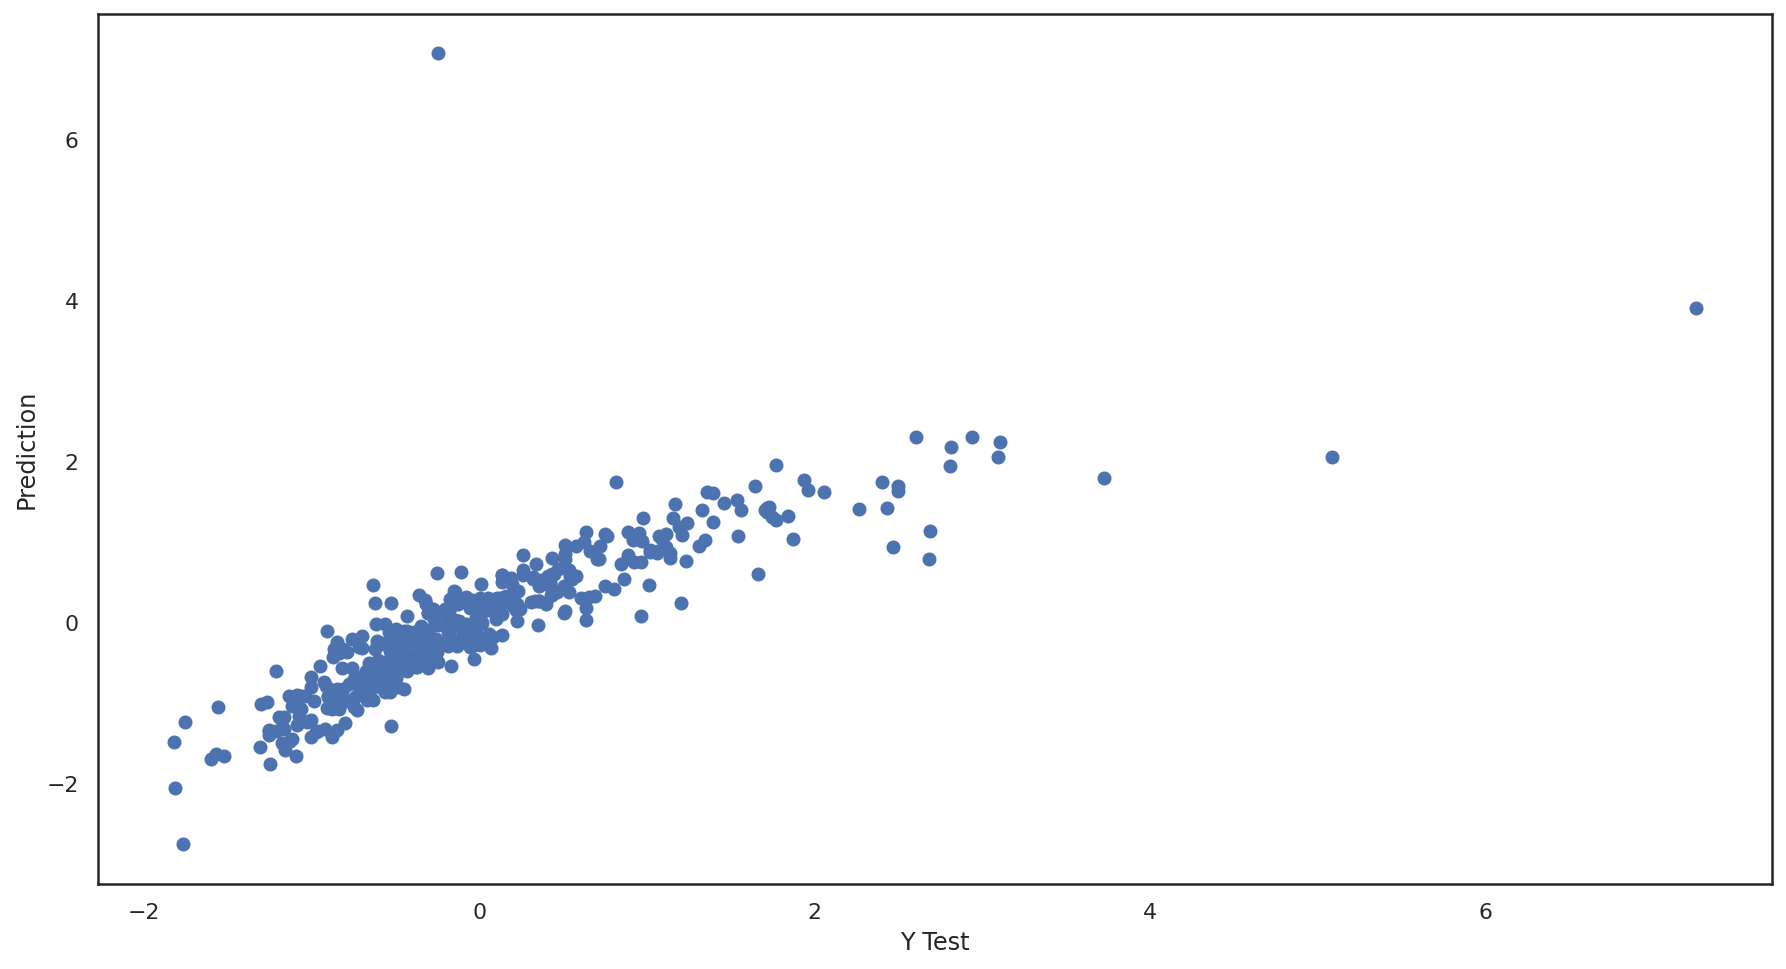

In [49]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

In [50]:
#calculating MAE(Mean Absolute Error), MSE(Mean Square Error), & RMSE(Root Mean Square Error)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.28939513145279994
Mean Square Error: 0.2992402219948465
Root Mean Square Error: 0.5470285385561219


In [51]:
#Decision Tree Regression
Tree_reg= DecisionTreeRegressor(random_state = 100)
Tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [52]:
tree_reg = Tree_reg.predict(X_test)
tree_reg= tree_reg.reshape(-1,1)


In [53]:
print('Mean Absolute Erorr:', metrics.mean_absolute_error(y_test, tree_reg))
print('Mean Square Erorr:', metrics.mean_squared_error(y_test, tree_reg))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_reg)))

Mean Absolute Erorr: 0.3369784005941068
Mean Square Erorr: 0.2648938396220234
Root Mean Square Error: 0.5146783846462015


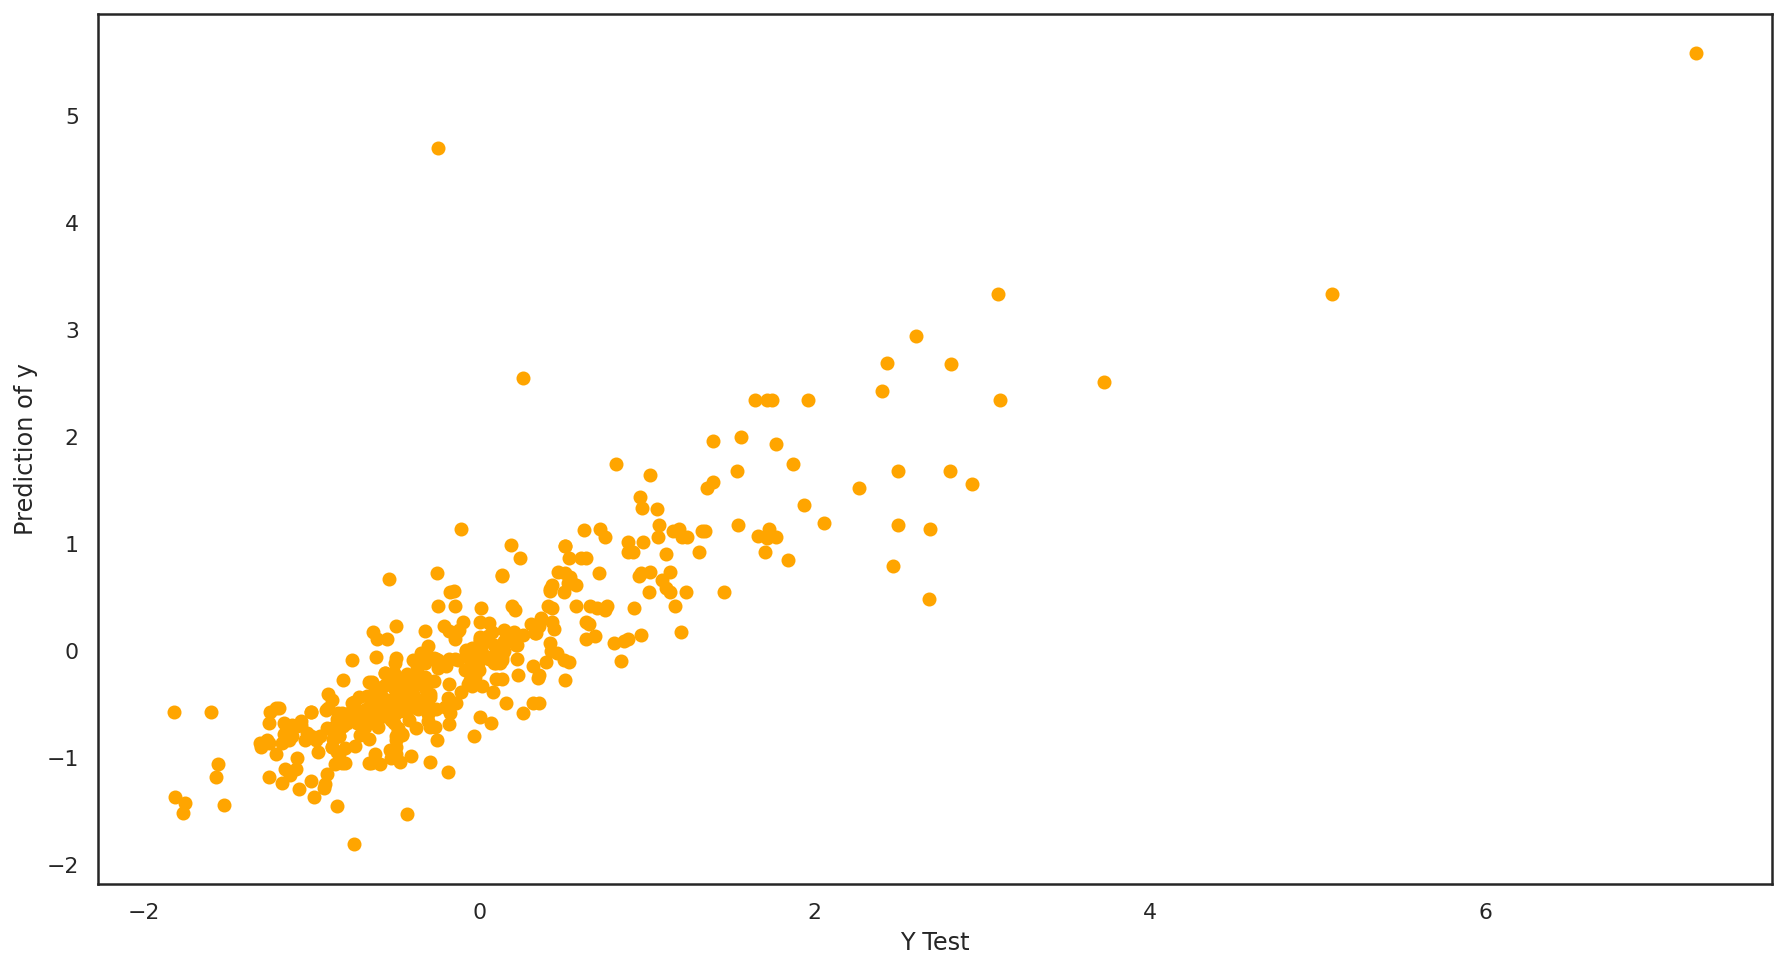

In [54]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,tree_reg,c='orange')
plt.xlabel('Y Test')
plt.ylabel('Prediction of y')
plt.show()

In [55]:
#Random forest regressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [56]:
rfr_pred= rfr.predict(X_test)
rfr_pred= rfr_pred.reshape(-1,1)

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfr_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, rfr_pred))
print('Root Mean Square Erorr:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

Mean Absolute Error: 0.24223432767963873
Mean Square Error: 0.16312751790925062
Root Mean Square Erorr: 0.4038904776164581


**By looking MAE & MSE, RandomForestRegressor supports the working model.** 